In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### 1 - Introduction to Matplotlib

In [2]:
url_seattle = 'https://raw.githubusercontent.com/KelvinMulyawan/Gudang/master/seattle.csv'

seattle = pd.read_csv(url_seattle)
seattle.head()

,STATION,NAME,DATE,MLY-CLDD-BASE45,MLY-CLDD-BASE50,MLY-CLDD-BASE55,MLY-CLDD-BASE57,MLY-CLDD-BASE60,MLY-CLDD-BASE70,MLY-CLDD-BASE72,MLY-CLDD-NORMAL,MLY-DUTR-NORMAL,MLY-DUTR-STDDEV,MLY-GRDD-BASE40,MLY-GRDD-BASE45,MLY-GRDD-BASE50,MLY-GRDD-BASE55,MLY-GRDD-BASE57,MLY-GRDD-BASE60,MLY-GRDD-BASE65,MLY-GRDD-BASE70,MLY-GRDD-BASE72,MLY-GRDD-TB4886,MLY-GRDD-TB5086,MLY-HTDD-BASE40,MLY-HTDD-BASE45,MLY-HTDD-BASE50,MLY-HTDD-BASE55,MLY-HTDD-BASE57,MLY-HTDD-BASE60,MLY-HTDD-NORMAL,MLY-PRCP-25PCTL,MLY-PRCP-50PCTL,MLY-PRCP-75PCTL,MLY-PRCP-AVGNDS-GE001HI,MLY-PRCP-AVGNDS-GE010HI,MLY-PRCP-AVGNDS-GE050HI,MLY-PRCP-AVGNDS-GE100HI,MLY-PRCP-NORMAL,MLY-SNOW-25PCTL,MLY-SNOW-50PCTL,MLY-SNOW-75PCTL,MLY-SNOW-AVGNDS-GE001TI,MLY-SNOW-AVGNDS-GE010TI,MLY-SNOW-AVGNDS-GE030TI,MLY-SNOW-AVGNDS-GE050TI,MLY-SNOW-AVGNDS-GE100TI,MLY-SNOW-NORMAL,MLY-SNWD-AVGNDS-GE001WI,MLY-SNWD-AVGNDS-GE003WI,MLY-SNWD-AVGNDS-GE005WI,MLY-SNWD-AVGNDS-GE010WI,MLY-TAVG-NORMAL,MLY-TAVG-STDDEV,MLY-TMAX-AVGNDS-GRTH040,MLY-TMAX-AVGNDS-GRTH050,MLY-TMAX-AVGNDS-GRTH060,MLY-TMAX-AVGNDS-GRTH070,MLY-TMAX-AVGNDS-GRTH080,MLY-TMAX-AVGNDS-GRTH090,MLY-TMAX-AVGNDS-GRTH100,MLY-TMAX-AVGNDS-LSTH032,MLY-TMAX-NORMAL,MLY-TMAX-STDDEV,MLY-TMIN-AVGNDS-LSTH000,MLY-TMIN-AVGNDS-LSTH010,MLY-TMIN-AVGNDS-LSTH020,MLY-TMIN-AVGNDS-LSTH032,MLY-TMIN-AVGNDS-LSTH040,MLY-TMIN-AVGNDS-LSTH050,MLY-TMIN-AVGNDS-LSTH060,MLY-TMIN-AVGNDS-LSTH070,MLY-TMIN-NORMAL,MLY-TMIN-PRBOCC-LSTH016,MLY-TMIN-PRBOCC-LSTH020,MLY-TMIN-PRBOCC-LSTH024,MLY-TMIN-PRBOCC-LSTH028,MLY-TMIN-PRBOCC-LSTH032,MLY-TMIN-PRBOCC-LSTH036,MLY-TMIN-STDDEV
0,USC00456295,"PALMER 3 ESE, WA US",1,13.0,1.0,-7777.0,0.0,0.0,0.0,0.0,0.0,10.6,1.4,61.0,13.0,1.0,-7777.0,0.0,0.0,0.0,0.0,0.0,20.0,12.0,83.0,190.0,333.0,487.0,549.0,642.0,797.0,8.06,11.59,13.39,19.9,16.5,8.0,3.1,11.03,0.0,2.0,4.5,2.1,1.9,0.9,0.2,-7777.0,5.3,4.3,2.5,1.4,0.6,39.3,2.7,236.0,6.4,2.0,0.0,0.0,0.0,0.0,1.0,44.6,2.9,0.0,1.0,7.0,10.4,265.0,310.0,310.0,310.0,34.0,168.0,327.0,615.0,877.0,987.0,1000.0,2.8
1,USC00456295,"PALMER 3 ESE, WA US",2,23.0,3.0,-7777.0,-7777.0,0.0,0.0,0.0,0.0,13.7,1.7,78.0,23.0,3.0,-7777.0,-7777.0,0.0,0.0,0.0,0.0,35.0,24.0,57.0,142.0,262.0,399.0,455.0,539.0,679.0,5.41,7.01,10.00,17.1,12.5,5.5,1.8,7.74,0.0,0.3,5.5,1.6,1.4,0.5,0.1,-7777.0,3.4,2.9,1.6,1.0,0.5,40.7,3.1,245.0,10.0,12.0,0.0,0.0,0.0,0.0,0.3,47.6,3.4,-7777.0,1.0,9.0,10.0,232.0,279.0,280.0,280.0,33.9,132.0,275.0,515.0,800.0,963.0,1000.0,3.1
2,USC00456295,"PALMER 3 ESE, WA US",3,50.0,11.0,1.0,-7777.0,-7777.0,0.0,0.0,0.0,15.8,1.7,138.0,50.0,11.0,1.0,-7777.0,-7777.0,0.0,0.0,0.0,78.0,60.0,21.0,87.0,203.0,349.0,410.0,502.0,657.0,7.76,8.66,10.66,21.5,16.5,6.8,2.2,9.08,0.0,0.0,3.2,0.9,0.6,0.2,0.1,-7777.0,2.0,0.8,0.3,0.1,0.0,43.8,2.5,299.0,16.9,46.0,2.0,0.0,0.0,0.0,-7777.0,51.7,3.0,0.0,0.0,1.0,5.3,253.0,310.0,310.0,310.0,35.9,5.0,47.0,111.0,393.0,848.0,1000.0,2.1
3,USC00456295,"PALMER 3 ESE, WA US",4,108.0,40.0,12.0,7.0,3.0,-7777.0,0.0,-7777.0,18.3,2.0,227.0,108.0,40.0,12.0,7.0,3.0,-7777.0,-7777.0,0.0,136.0,111.0,4.0,34.0,117.0,239.0,293.0,379.0,527.0,5.85,7.61,8.67,19.6,14.8,5.5,1.4,7.37,0.0,0.0,0.5,0.4,0.3,0.0,0.0,0.0,0.4,0.2,0.0,0.0,0.0,47.4,2.1,299.0,23.3,89.0,26.0,3.0,0.0,0.0,0.0,56.6,2.6,0.0,0.0,0.0,1.2,203.0,297.0,300.0,300.0,38.3,0.0,0.0,5.0,123.0,571.0,978.0,2.0
4,USC00456295,"PALMER 3 ESE, WA US",5,255.0,130.0,56.0,38.0,19.0,1.0,-7777.0,5.0,19.3,2.6,406.0,255.0,130.0,56.0,38.0,19.0,5.0,1.0,-7777.0,235.0,201.0,-7777.0,4.0,34.0,115.0,159.0,233.0,374.0,4.95,6.43,8.00,17.9,12.8,4.5,1.5,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.1,2.2,310.0,29.7,165.0,69.0,15.0,0.1,0.0,0.0,62.7,3.1,0.0,0.0,0.0,-7777.0,76.0,282.0,310.0,310.0,43.5,0.0,0.0,0.0,0.0,83.0,610.0,2.0


In [3]:
seattle = seattle[seattle['STATION']=='USW00094290']
seattle.head()

,STATION,NAME,DATE,MLY-CLDD-BASE45,MLY-CLDD-BASE50,MLY-CLDD-BASE55,MLY-CLDD-BASE57,MLY-CLDD-BASE60,MLY-CLDD-BASE70,MLY-CLDD-BASE72,MLY-CLDD-NORMAL,MLY-DUTR-NORMAL,MLY-DUTR-STDDEV,MLY-GRDD-BASE40,MLY-GRDD-BASE45,MLY-GRDD-BASE50,MLY-GRDD-BASE55,MLY-GRDD-BASE57,MLY-GRDD-BASE60,MLY-GRDD-BASE65,MLY-GRDD-BASE70,MLY-GRDD-BASE72,MLY-GRDD-TB4886,MLY-GRDD-TB5086,MLY-HTDD-BASE40,MLY-HTDD-BASE45,MLY-HTDD-BASE50,MLY-HTDD-BASE55,MLY-HTDD-BASE57,MLY-HTDD-BASE60,MLY-HTDD-NORMAL,MLY-PRCP-25PCTL,MLY-PRCP-50PCTL,MLY-PRCP-75PCTL,MLY-PRCP-AVGNDS-GE001HI,MLY-PRCP-AVGNDS-GE010HI,MLY-PRCP-AVGNDS-GE050HI,MLY-PRCP-AVGNDS-GE100HI,MLY-PRCP-NORMAL,MLY-SNOW-25PCTL,MLY-SNOW-50PCTL,MLY-SNOW-75PCTL,MLY-SNOW-AVGNDS-GE001TI,MLY-SNOW-AVGNDS-GE010TI,MLY-SNOW-AVGNDS-GE030TI,MLY-SNOW-AVGNDS-GE050TI,MLY-SNOW-AVGNDS-GE100TI,MLY-SNOW-NORMAL,MLY-SNWD-AVGNDS-GE001WI,MLY-SNWD-AVGNDS-GE003WI,MLY-SNWD-AVGNDS-GE005WI,MLY-SNWD-AVGNDS-GE010WI,MLY-TAVG-NORMAL,MLY-TAVG-STDDEV,MLY-TMAX-AVGNDS-GRTH040,MLY-TMAX-AVGNDS-GRTH050,MLY-TMAX-AVGNDS-GRTH060,MLY-TMAX-AVGNDS-GRTH070,MLY-TMAX-AVGNDS-GRTH080,MLY-TMAX-AVGNDS-GRTH090,MLY-TMAX-AVGNDS-GRTH100,MLY-TMAX-AVGNDS-LSTH032,MLY-TMAX-NORMAL,MLY-TMAX-STDDEV,MLY-TMIN-AVGNDS-LSTH000,MLY-TMIN-AVGNDS-LSTH010,MLY-TMIN-AVGNDS-LSTH020,MLY-TMIN-AVGNDS-LSTH032,MLY-TMIN-AVGNDS-LSTH040,MLY-TMIN-AVGNDS-LSTH050,MLY-TMIN-AVGNDS-LSTH060,MLY-TMIN-AVGNDS-LSTH070,MLY-TMIN-NORMAL,MLY-TMIN-PRBOCC-LSTH016,MLY-TMIN-PRBOCC-LSTH020,MLY-TMIN-PRBOCC-LSTH024,MLY-TMIN-PRBOCC-LSTH028,MLY-TMIN-PRBOCC-LSTH032,MLY-TMIN-PRBOCC-LSTH036,MLY-TMIN-STDDEV
72,USW00094290,"SEATTLE SAND PT WSFO, WA US",1,27.0,3.0,-7777.0,-7777.0,0.0,0.0,0.0,0.0,10.2,1.4,104.0,27.0,3.0,-7777.0,-7777.0,0.0,0.0,0.0,0.0,28.0,16.0,39.0,117.0,247.0,400.0,462.0,555.0,710.0,3.29,4.99,6.07,18.5,12.1,3.1,0.7,4.81,0.0,0.0,0.0,0.6,0.3,0.0,0.0,0.0,0.4,0.2,0.0,0.0,0.0,42.1,2.2,279.0,10.1,2.0,0.0,0.0,0.0,0.0,0.3,47.2,2.4,0.0,0.0,1.0,6.4,203.0,309.0,310.0,310.0,37.0,64.0,129.0,317.0,709.0,959.0,1000.0,2.3
73,USW00094290,"SEATTLE SAND PT WSFO, WA US",2,31.0,3.0,-7777.0,-7777.0,0.0,0.0,0.0,0.0,13.1,1.8,116.0,31.0,3.0,-7777.0,-7777.0,0.0,0.0,0.0,0.0,47.0,31.0,19.0,75.0,186.0,323.0,379.0,463.0,603.0,2.09,3.08,4.44,14.1,7.6,1.4,0.1,3.31,0.0,0.0,0.0,0.4,0.2,0.1,0.0,0.0,0.6,0.3,0.1,0.0,0.0,43.4,2.3,269.0,13.3,14.0,0.0,0.0,0.0,0.0,0.0,50.0,2.4,0.0,0.0,1.0,5.0,190.0,280.0,280.0,280.0,36.9,15.0,76.0,273.0,616.0,917.0,1000.0,2.6
74,USW00094290,"SEATTLE SAND PT WSFO, WA US",3,81.0,16.0,2.0,-7777.0,-7777.0,0.0,0.0,0.0,14.5,1.2,207.0,81.0,16.0,2.0,-7777.0,-7777.0,0.0,0.0,0.0,97.0,72.0,4.0,33.0,123.0,263.0,324.0,417.0,572.0,2.60,3.46,3.93,17.1,10.1,1.7,0.4,3.51,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,-7777.0,0.0,0.0,0.0,0.0,46.6,2.0,308.0,23.0,45.0,3.0,0.0,0.0,0.0,0.0,53.8,2.4,0.0,0.0,0.0,1.6,173.0,310.0,310.0,310.0,39.3,0.0,20.0,41.0,152.0,670.0,986.0,1.8
75,USW00094290,"SEATTLE SAND PT WSFO, WA US",4,169.0,58.0,12.0,6.0,1.0,0.0,0.0,-7777.0,16.0,1.7,315.0,169.0,58.0,12.0,6.0,1.0,-7777.0,0.0,0.0,160.0,130.0,-7777.0,4.0,43.0,147.0,200.0,286.0,435.0,2.10,2.68,2.94,15.0,8.2,1.3,0.1,2.77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.5,1.6,300.0,28.4,105.0,12.0,1.0,0.0,0.0,0.0,58.5,2.0,0.0,0.0,0.0,-7777.0,80.0,293.0,300.0,300.0,42.5,0.0,0.0,0.0,0.0,114.0,711.0,1.5
76,USW00094290,"SEATTLE SAND PT WSFO, WA US",5,343.0,193.0,78.0,49.0,21.0,-7777.0,-7777.0,3.0,16.5,1.8,497.0,343.0,193.0,78.0,49.0,21.0,3.0,-7777.0,-7777.0,277.0,234.0,0.0,-7777.0,5.0,46.0,78.0,144.0,281.0,1.34,1.95,2.91,12.5,6.5,1.0,0.1,2.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,2.2,310.0,30.9,222.0,63.0,8.0,0.0,0.0,0.0,64.3,2.8,0.0,0.0,0.0,0.0,12.0,214.0,310.0,310.0,47.8,0.0,0.0,0.0,0.0,0.0,58.0,1.9


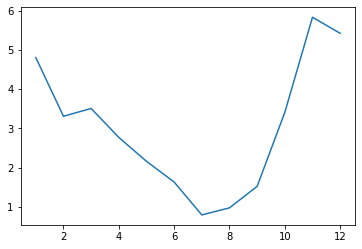

In [4]:
date = seattle['DATE']
mly_prcp_normal = seattle['MLY-PRCP-NORMAL']

fig, ax = plt.subplots()
ax.plot(date,mly_prcp_normal)
plt.show()

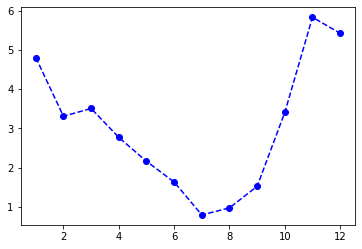

In [5]:
fig, ax = plt.subplots()
ax.plot(date,mly_prcp_normal,color='b',
        linestyle='--',
        marker='o')
plt.show()

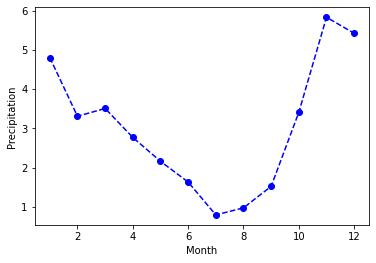

In [6]:
fig, ax = plt.subplots()
ax.plot(date,mly_prcp_normal,color='b',
        linestyle='--',
        marker='o')
ax.set_xlabel("Month")
ax.set_ylabel("Precipitation")
plt.show()

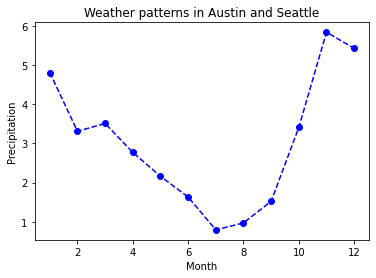

In [7]:
fig, ax = plt.subplots()
ax.plot(date,mly_prcp_normal,color='b',
        linestyle='--',
        marker='o')
ax.set_xlabel("Month")
ax.set_ylabel("Precipitation")
ax.set_title("Weather patterns in Austin and Seattle")
plt.show()

### 2 - Plotting time-series

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


url_climate = "https://raw.githubusercontent.com/KelvinMulyawan/Gudang/master/climate_change.csv"

climate = pd.read_csv(url_climate,
                      parse_dates=["date"], 
                      index_col="date")
climate.head()

,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06


In [9]:
climate.isnull().sum()

co2              7
relative_temp    0
dtype: int64

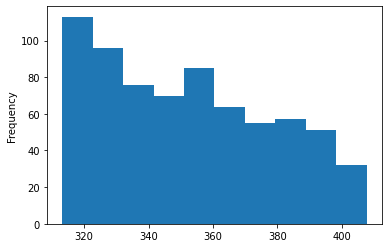

In [10]:
climate['co2'].plot(kind='hist')
plt.show()

In [11]:
climate['co2'] = climate['co2'].ffill()

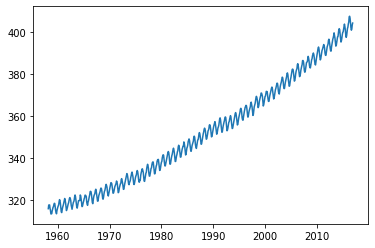

In [12]:
co2 = climate['co2']

fig, ax = plt.subplots()
ax.plot(climate.index,co2)
plt.show()

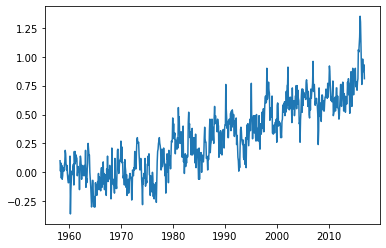

In [13]:
relative_temp = climate['relative_temp']

fig, ax = plt.subplots()
ax.plot(climate.index,relative_temp)
plt.show()

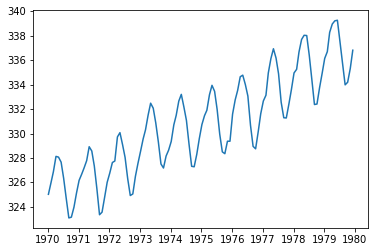

In [14]:
seventies = climate["1970-01-01":"1979-12-31"]

fig, ax = plt.subplots()

ax.plot(seventies.index, seventies["co2"])

plt.show()

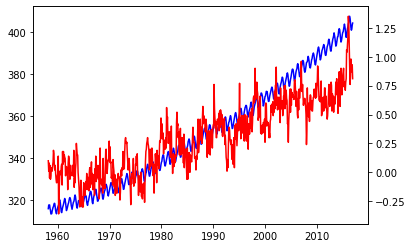

In [17]:
fig, ax = plt.subplots()

ax.plot(climate.index, climate["co2"], color='blue')

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

ax2.plot(climate.index, climate["relative_temp"], color='red')

plt.show()

In [18]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

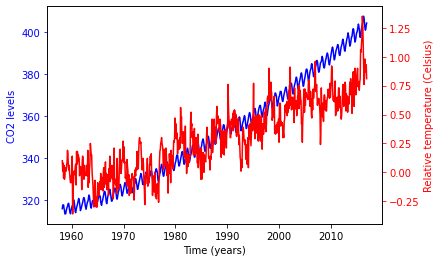

In [19]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate.index, climate["co2"], 'blue', "Time (years)", "CO2 levels")

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate.index, climate['relative_temp'], 'red', "Time (years)", "Relative temperature (Celsius)")

plt.show()

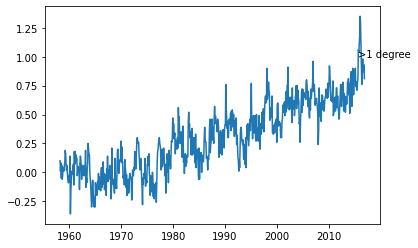

In [20]:
fig, ax = plt.subplots()

# Plot the relative temperature data
ax.plot(climate.index, climate['relative_temp'])

# Annotate the date at which temperatures exceeded 1 degree
ax.annotate(">1 degree", xy=(pd.Timestamp('2015-10-06'), 1))

plt.show()

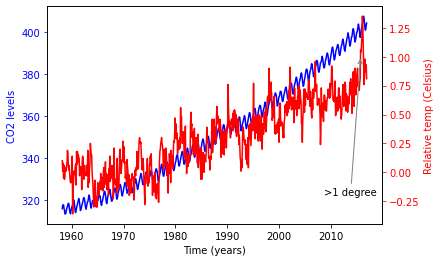

In [21]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate.index, climate["co2"], 'blue', "Time (years)", "CO2 levels")

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate.index, climate['relative_temp'], 'red', "Time (years)", "Relative temp (Celsius)")

# Annotate the point with relative temperature >1 degree
ax2.annotate(">1 degree", xy=(pd.Timestamp('2015-10-06'), 1), xytext=(pd.Timestamp('2008-10-06'), -0.2), arrowprops={'arrowstyle':'->', 'color':'gray'})

plt.show()

### 3 - Quantitative comparisons and statistical visualizations

In [27]:
url = "https://raw.githubusercontent.com/KelvinMulyawan/Gudang/master/medals.csv"

medals = pd.read_csv(url).rename(columns={'Unnamed: 0':'Country'}).set_index('Country')
medals.head()

,Bronze,Gold,Silver
Country,,,
United States,67,137,52
Germany,67,47,43
Great Britain,26,64,55
Russia,35,50,28
China,35,44,30


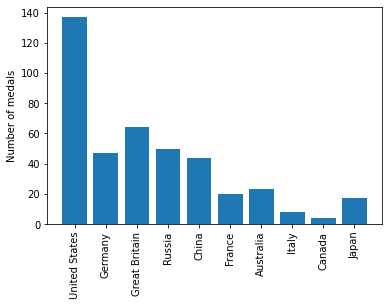

In [28]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(medals.index, medals["Gold"])

# Set the x-axis tick labels to the country names
ax.set_xticklabels(medals.index, rotation=90)

# Set the y-axis label
ax.set_ylabel("Number of medals")

plt.show()

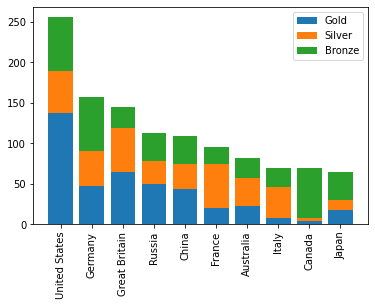

In [33]:
fig, ax = plt.subplots()

# Add bars for "Gold" with the label "Gold"
ax.bar(medals.index, medals["Gold"], label="Gold")

# Stack bars for "Silver" on top with label "Silver"
ax.bar(medals.index, medals["Silver"], bottom=medals["Gold"], label="Silver")

# Stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(medals.index, medals["Bronze"], bottom=medals["Gold"] + medals["Silver"], label="Bronze")

ax.set_xticklabels(medals.index, rotation=90)

# Display the legend
ax.legend()

plt.show()

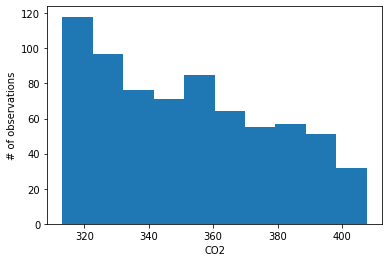

In [34]:
fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(climate["co2"])

# Set the x-axis label to "Weight (kg)"
ax.set_xlabel("CO2")

# Set the y-axis label to "# of observations"
ax.set_ylabel("# of observations")

plt.show()

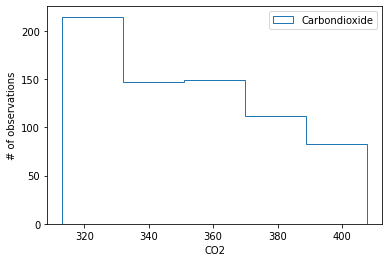

In [36]:
fig, ax = plt.subplots()

# Plot a histogram of CO2
ax.hist(climate["co2"], histtype='step', bins=5, label="Carbondioxide")

# Set the x-axis label to "Weight (kg)"
ax.set_xlabel("CO2")

# Set the y-axis label to "# of observations"
ax.set_ylabel("# of observations")

ax.legend()

plt.show()

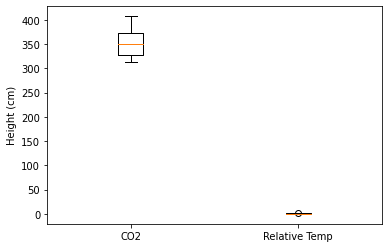

In [37]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([climate["co2"], climate["relative_temp"]])

# Add x-axis tick labels:
ax.set_xticklabels(["CO2", "Relative Temp"])

# Add a y-axis label
ax.set_ylabel("Height (cm)")

plt.show()

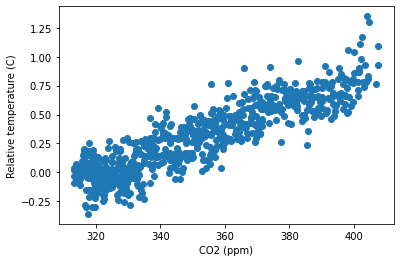

In [38]:
fig, ax = plt.subplots()

# Add data: "co2" on x-axis, "relative_temp" on y-axis
ax.scatter(climate["co2"], climate["relative_temp"])

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("CO2 (ppm)")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Relative temperature (C)")

plt.show()

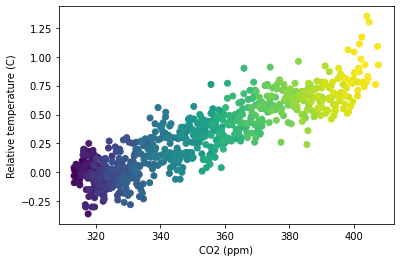

In [39]:
fig, ax = plt.subplots()

# Add data: "co2" on x-axis, "relative_temp" on y-axis
ax.scatter(climate["co2"], climate["relative_temp"],c=climate.index)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("CO2 (ppm)")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Relative temperature (C)")

plt.show()

## Bonus

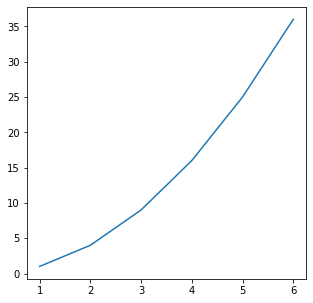

In [41]:
plt.rcParams["figure.figsize"] = (5,5)

x = [1,2,3,4,5,6]
y = [nilai**2 for nilai in x]

fig, ax = plt.subplots()
ax.plot(x,y)
plt.show()